In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import pickle

# **Loading the dataset "Algerian_forest_fires_cleaned.csv"**

In [85]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# **Data Cleaning and Preprocessing**
This step includes the following steps
1. Check for null values
2. Encode actegorical variables if present
3. Feature enginnering (if applicable)
4. Normalize features

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Convert non-numeric columns to numeric before dropping/transforming
if 'Classes' in df.columns:
    df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})

# Drop 'Region' or one-hot encode it
if 'Region' in df.columns:
    df = pd.get_dummies(df, columns=['Region'], drop_first=True)

#Drop columns that are still fully NaN
df =df.dropna(axis=1, how='all')

# Separate features and target
x = df.drop('FWI', axis=1)
y = df['FWI']

#Impute missing values
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Standardize numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)


# **Train-Test Split**

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# **Modeling with Linear Regression and regularization**

In [88]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

#Ridge Regression with Cross-Validation
ridge = Ridge()
params_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5)
ridge_cv.fit(x_train, y_train)
y_pred_ridge = ridge_cv.predict(x_test)

#Lasso Regression with Cross-Validation
lasso= Lasso(max_iter=10000)
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5)
lasso_cv.fit(x_train, y_train)
y_pred_lasso = lasso_cv.predict(x_test)

# **Model Evaluation**

In [89]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(y_true, y_pred)

    print(f"{name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print("-" * 30)

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Linear Regression Performance:
R2 Score: 0.9872
MSE: 0.3868
RMSE: 0.6220
MAE: 0.4712
------------------------------
Ridge Regression Performance:
R2 Score: 0.9688
MSE: 0.9470
RMSE: 0.9731
MAE: 0.6800
------------------------------
Lasso Regression Performance:
R2 Score: 0.9824
MSE: 0.5327
RMSE: 0.7299
MAE: 0.5453
------------------------------


All the 3 models achieved a good R2 Score but the MSE are relatively high which indicates a need for further model tuning.

# **Visualizations**
Use Correlation heatmap, FWI distribution and Predicted vs Actual


### **Correlation Heatmap for Numerical only**

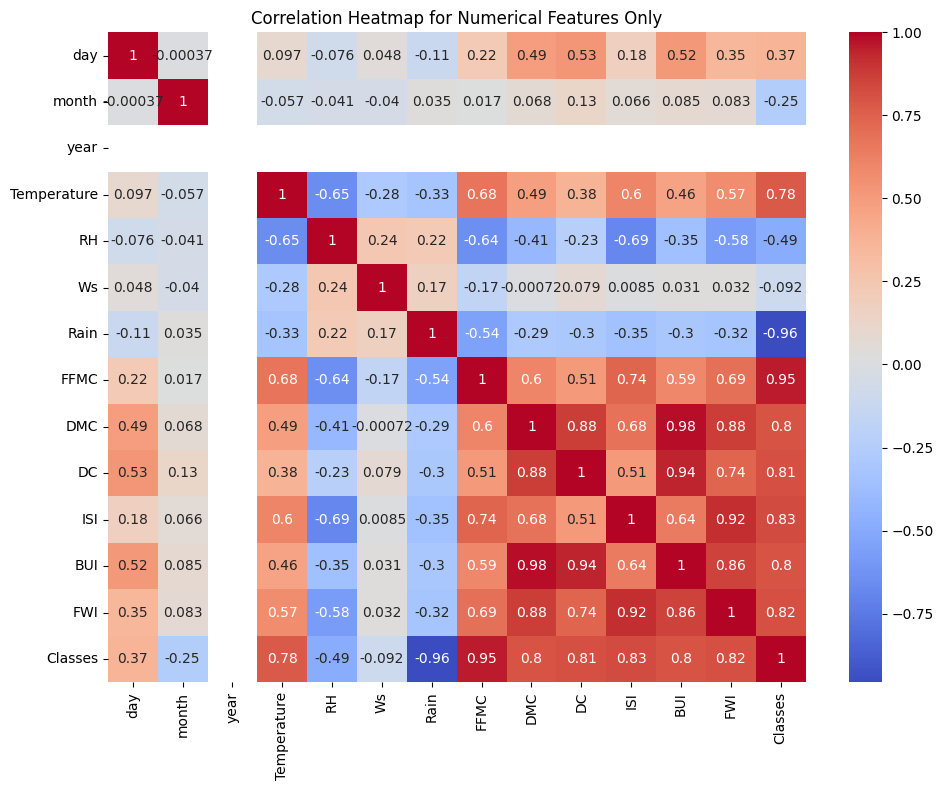

In [90]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features Only')
plt.tight_layout()
plt.show()

### **Observation from Correlation heatmap**
1. FWI (Fire Weather Index) shows strong positive correlations with key fire-related indices:

> DC (r = 0.86), DMC (r = 0.88), and BUI (r = 0.82) — indicating that as fuel moisture codes and buildup indices increase, so does the FWI.

> FFMC (r = 0.69) and ISI (r = 0.74) also contribute meaningfully, reflecting dry and wind-driven conditions.

2. Temperature is positively correlated with FWI (r = 0.57) and highly correlated with Classes (r = 0.78), suggesting warmer temperatures strongly influence both fire likelihood and intensity classification.

3. Rain has a strong negative correlation with FWI (r = -0.32) and especially with Classes (r = -0.96), confirming that rainfall significantly reduces fire risk and severity.

4. RH (Relative Humidity) shows a negative correlation with FWI (r = -0.58), implying that drier air (lower RH) increases fire risk.

5. Classes is highly aligned with most fire-related variables like DC, DMC, FFMC, and ISI, suggesting it's a strong categorical reflection of the FWI components.

The correlation analysis confirms that fuel dryness (DC, DMC, FFMC), temperature, and wind-driven fire potential (ISI) are the strongest contributors to the Fire Weather Index. Conversely, rainfall and humidity act as suppressors of fire activity. These insights validate the relevance of these features in predicting forest fire intensity in Algeria.

### **Actual vs Predicted Plot for All Models**

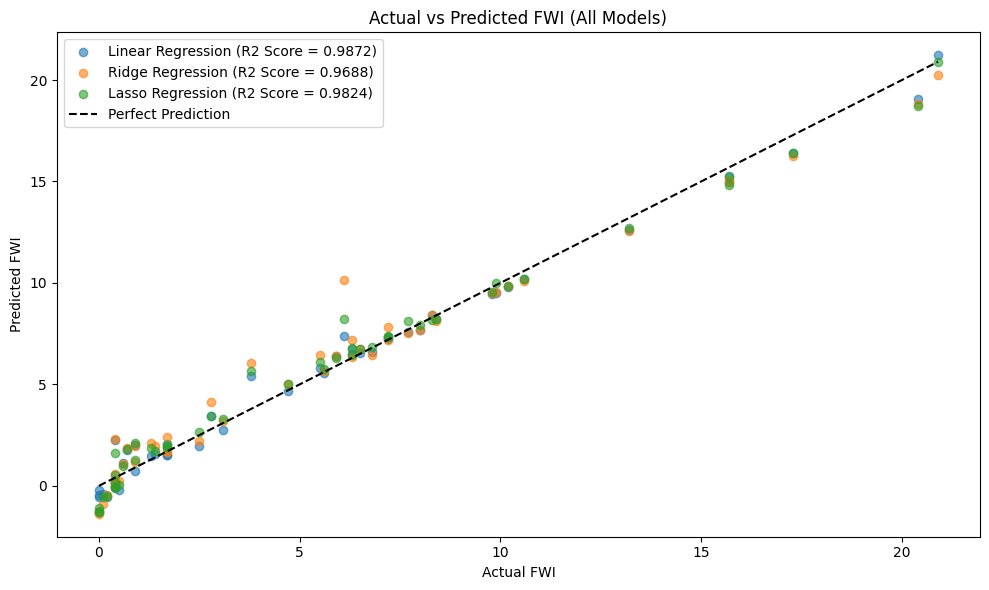

In [91]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

plt.figure(figsize=(10, 6))

#Plot prediction vs actuals for each model
plt.scatter(y_test, y_pred_lr, alpha=0.6, label=f'Linear Regression (R2 Score = {r2_lr:.4f})')
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label=f'Ridge Regression (R2 Score = {r2_ridge:.4f})')
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label=f'Lasso Regression (R2 Score = {r2_lasso:.4f})')

#Reference Line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Perfect Prediction')

plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI (All Models)')
plt.legend()
plt.tight_layout()
plt.show()

All three models demonstrate excellent predictive performance, with Lasso marginally outperforming others — making it a strong candidate for final deployment.

# **Hyperparameter Tuning**
Feature Engineering + Selection + 3 Model Evaluation (Linear, Lasso, Ridge)

In [96]:
# Define model dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(max_iter=10000)
}

# Define parameter grids
param_grids = {
    "Linear Regression": {
        'poly__degree': [1, 2],
        'select__k': [5, 8, 'all']
    },
    "Ridge Regression": {
        'poly__degree': [1, 2],
        'select__k': [5, 8, 'all'],
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    "Lasso Regression": {
        'poly__degree': [1, 2],
        'select__k': [5, 8, 'all'],
        'model__alpha': [0.01, 0.1, 1, 10]
    }
}

# Evaluation function with error handling
def evaluate_model(name, y_true, y_pred):
    try:
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)

        print(f"{name} Performance:")
        print(f"R² Score: {r2:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print("-" * 40)
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# Model training and evaluation loop with error handling
for name, model in models.items():
    try:
        print(f"Training: {name}")

        # Create pipeline
        pipeline = Pipeline([
            ('poly', PolynomialFeatures(include_bias=False)),
            ('select', SelectKBest(score_func=f_regression)),
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        # Perform Grid Search
        grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='r2')
        grid.fit(x_train, y_train)

        # Prediction
        y_pred = grid.predict(x_test)

        # Evaluation
        evaluate_model(name, y_test, y_pred)

        # Best parameters
        print("Best Params:", grid.best_params_)
        print()

    except ValueError as ve:
        print(f"ValueError in {name}: {ve}")
    except Exception as e:
        print(f"Unexpected error in {name}: {e}")


Training: Linear Regression
Linear Regression Performance:
R² Score: 0.9794
MSE: 0.6254
RMSE: 0.7908
MAE: 0.3696
----------------------------------------
Best Params: {'poly__degree': 2, 'select__k': 'all'}

Training: Ridge Regression
Ridge Regression Performance:
R² Score: 0.9934
MSE: 0.2008
RMSE: 0.4481
MAE: 0.2899
----------------------------------------
Best Params: {'model__alpha': 0.1, 'poly__degree': 2, 'select__k': 'all'}

Training: Lasso Regression
Lasso Regression Performance:
R² Score: 0.9936
MSE: 0.1941
RMSE: 0.4406
MAE: 0.3057
----------------------------------------
Best Params: {'model__alpha': 0.01, 'poly__degree': 2, 'select__k': 'all'}



# **Conclusion**

After performing feature engineering and selection, the 3 models improved the MSE. Ridge and Lasso regression significantly outperformed standard Linear Regression, achieving higher R² scores (~0.994) and lower error metrics (MSE, RMSE, MAE).
This demonstrates that regularization combined with polynomial feature engineering and full feature selection greatly enhances model accuracy for predicting FWI.

# **Model Serialization**

In [98]:
with open('aml3104_assignment1_fwi.pkl', 'wb') as file:
  pickle.dump(ridge_cv.best_estimator_,file)